In [57]:
from astropy import *
import astropy.units as u
import numpy as np
from astroquery.simbad import Simbad
import astropy.coordinates as coord

from astropy.io import ascii
from astropy.io import fits
import os.path
# 
import elk
from elk.ensemble import EnsembleLC
from elk.lightcurve import BasicLightcurve

from astropy.table import Table, join, MaskedColumn, vstack, Column
from matplotlib import pyplot as plt
import glob

In [58]:
path = '/uufs/astro.utah.edu/common/home/u1363702/notebooks/tess_clusters/TESS_Cluster_Age_ML'

In [59]:
path='/uufs/astro.utah.edu/common/home/u1363702/notebooks/tess_clusters/TESS_Cluster_Age_ML/light_curves/'

filenames =  glob.glob(path + 'all/*.fits')

l_of_cs=[]

fnames = []
nhdus = []

import time 

t0 = time.time()
print(len(filenames))
for file in filenames:
    hdul = fits.open(file)
    num_hdus = len(hdul) - 1
    hdul.close()

    fnames.append(file)
    nhdus.append(num_hdus)
t1 = time.time()
delta = t1 - t0
print('for all clusters, took {} seconds'.format(delta))
t1 = time.time()
delta = t1 - t0

348
for all clusters, took 4.177944183349609 seconds


(array([208.,  28.,   4.,   5.,   9.,  20.,  26.,  23.,  16.,   9.]),
 array([ 1. ,  3.2,  5.4,  7.6,  9.8, 12. , 14.2, 16.4, 18.6, 20.8, 23. ]),
 <BarContainer object of 10 artists>)

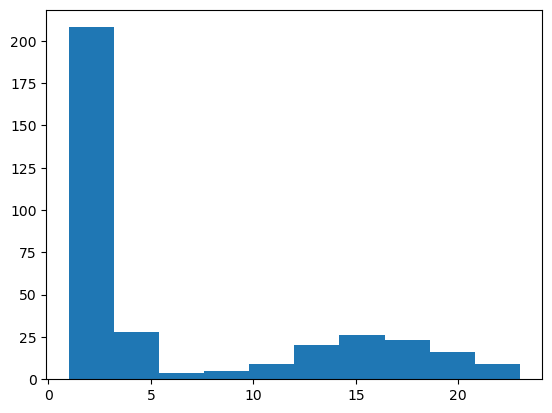

In [60]:
plt.hist(nhdus)

In [61]:
from astropy.io import fits
import itertools

arr = np.arange(1,5)

combos = []
for i in arr:
    t = []
    for j in range(1,i+1):
        t.append(j)
    combos.append(t)
for i in arr[1:]:
    t = []
    for j in range(i,max(arr)+1):
        t.append(j)
    combos.append(t)
combos
combos = combos[1:-1]
combos

[[1, 2], [1, 2, 3], [1, 2, 3, 4], [2, 3, 4], [3, 4]]

In [62]:


def get_combinations(num):
    
    arr = np.arange(1,num)
    
    combos = []
    for i in arr:
        t = []
        for j in range(1,i+1):
            t.append(j)
        combos.append(t)
    for i in arr[1:]:
        t = []
        for j in range(i,max(arr)+1):
            t.append(j)
        combos.append(t)
    return combos

In [63]:
synth_data = []
for i in nhdus:
    synth_data.append(len(get_combinations(i+1)))
# len(synth_data)
sum(synth_data)
# get_combinations(3)

4060

In [66]:
cluster_files = []
for i in filenames:
    t = i.split('/uufs/astro.utah.edu/common/home/u1363702/notebooks/tess_clusters/TESS_Cluster_Age_ML/light_curves/all/')[1]
    t = t.split('.fits')[0]
    cluster_files.append(t)

with open('cluster_names.txt', 'w') as f:
    for line in cluster_files:
        f.write(f"{line}\n")
f.close()

In [67]:
resampled_fpath = 'light_curves/resampled_fits_tables/'

In [54]:
def make_resampled_files(name):
    with fits.open('light_curves/all/' + name + '.fits') as hdul:
        num_hdus = len(hdul)
        count = 0
        for i in range(1,num_hdus):
            keep_hdus = [hdul[0]]
            string = ''
            keep_hdus.append(hdul[i])
            string = string + str(i)
            new_hdul = fits.HDUList(keep_hdus)
            new_hdul[0].header['sectors'] = string
            count +=1
        

            fname = '{}_{}.fits'.format(name,count)
            new_hdul.writeto(resampled_fpath + fname, overwrite=True)
            # print(count)
        
        combos = get_combinations(num_hdus)
        combos = combos[1:-1]

        for combination in combos:
            keep_hdus = [hdul[0]]
            string = ''
            for idx,j in enumerate(combination):
                keep_hdus.append(hdul[j])
                string = string + str(j) + ','
            string = string[:-1]
            new_hdul = fits.HDUList(keep_hdus)
            new_hdul[0].header['sectors'] = string
            count +=1

            fname = '{}_{}.fits'.format(name,count)
            new_hdul.writeto(resampled_fpath + fname, overwrite=True)
            # print(count)
        hdul.close()
        print('Done: ' + name)

In [56]:
for i in cluster_files:
    make_resampled_files(i)

Done: hlsp_elk_tess_ffi_ascc-116_tess_v1_llc
Done: hlsp_elk_tess_ffi_ascc-57_tess_v1_llc
Done: hlsp_elk_tess_ffi_ascc-81_tess_v1_llc
Done: hlsp_elk_tess_ffi_ascc-8_tess_v1_llc
Done: hlsp_elk_tess_ffi_ascc-9_tess_v1_llc
Done: hlsp_elk_tess_ffi_basel-12_tess_v1_llc
Done: hlsp_elk_tess_ffi_basel-13_tess_v1_llc
Done: hlsp_elk_tess_ffi_berkeley-43_tess_v1_llc
Done: hlsp_elk_tess_ffi_berkeley-44_tess_v1_llc
Done: hlsp_elk_tess_ffi_berkeley-49_tess_v1_llc
Done: hlsp_elk_tess_ffi_berkeley-50_tess_v1_llc
Done: hlsp_elk_tess_ffi_berkeley-66_tess_v1_llc
Done: hlsp_elk_tess_ffi_berkeley-82_tess_v1_llc
Done: hlsp_elk_tess_ffi_berkeley-83_tess_v1_llc
Done: hlsp_elk_tess_ffi_berkeley-84_tess_v1_llc
Done: hlsp_elk_tess_ffi_berkeley-85_tess_v1_llc
Done: hlsp_elk_tess_ffi_bmg-32_tess_v1_llc
Done: hlsp_elk_tess_ffi_bruck-100_tess_v1_llc
Done: hlsp_elk_tess_ffi_bruck-105_tess_v1_llc
Done: hlsp_elk_tess_ffi_bruck-108_tess_v1_llc
Done: hlsp_elk_tess_ffi_bruck-115_tess_v1_llc
Done: hlsp_elk_tess_ffi_bruck-47

In [13]:
resampled_fpath = 'light_curves/resampled_fits_tables/'

with fits.open('light_curves/MW/hlsp_elk_tess_ffi_ascc-116_tess_v1_llc.fits') as hdul:
    num_hdus = len(hdul)
    count = 0
    for i in range(1,num_hdus):
        keep_hdus = [hdul[0]]
        string = ''
        keep_hdus.append(hdul[i])
        string = string + str(i)
        new_hdul = fits.HDUList(keep_hdus)
        new_hdul[0].header['sectors'] = string
        count +=1
        

        fname = 'ascc_116_{}.fits'.format(count)
        new_hdul.writeto(resampled_fpath + fname, overwrite=True)
        print(count)

    print('Done Individuals!')
        
    combos = get_combinations(num_hdus)
    combos = combos[1:-1]

    for combination in combos:
        keep_hdus = [hdul[0]]
        string = ''
        for idx,j in enumerate(combination):
            keep_hdus.append(hdul[j])
            string = string + str(j) + ','
        string = string[:-1]
        new_hdul = fits.HDUList(keep_hdus)
        new_hdul[0].header['sectors'] = string
        count +=1

        fname = 'ascc_116_{}.fits'.format(count)
        new_hdul.writeto(resampled_fpath + fname, overwrite=True)
        print(count)
    hdul.close()

    

1
2
3
4
Done Individuals!
5
6
7
8
9


In [ ]:
combos

In [42]:
x = np.arange(1,5)

for i in range(1,len(x)+1):
    y = np.arange(1,5)
    for j in range(1,len(y)+1):
        print(i,j)

1 1
1 2
1 3
1 4
2 1
2 2
2 3
2 4
3 1
3 2
3 3
3 4
4 1
4 2
4 3
4 4


In [43]:
23*22*21*20

212520